# Welcome to the TGC Jupyter Notebook!
*Your source for everything TGC*

In [1]:
%matplotlib notebook
import Jupyter_Process_TGCPSM_Files as PF
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [2]:
# Generate pandas dataframe (df) from the provided csv files 
df = PF.generateDataframe()

In [3]:
#Limit the data to a date range

startDate = '2021-11-01'
endDate = '2022-12-01'

mask = (df['dateTime'] > startDate) & (df['dateTime'] <= endDate)
df = df.loc[mask]

In [4]:
# Lets get rid of some bad data:
# Replace 'bad' data with NaN
# then interpolate the missing values

# Temperature data
badIndexes = df[(df.BoxTemp < -50) | (df.BoxTemp > 70)].index
df.loc[badIndexes,'BoxTemp'] = np.nan
count = badIndexes.size
badIndexes = df[(df.CabinTemp < -50) | (df.CabinTemp > 70)].index
df.loc[badIndexes,'CabinTemp'] = np.nan
count += badIndexes.size
badIndexes = df[(df.OutsideTemp < -50) | (df.OutsideTemp > 70)].index
df.loc[badIndexes,'OutsideTemp'] = np.nan
count += badIndexes.size
print("Number of bad temperature readings: " + str(count))

#Battery Voltage drops to zero (Sensor noise?)
#df = df.drop(df[(df.BattV < 9)].index)
badIndexes = df[(df.BattV < 9)].index
df.loc[badIndexes,'BattV'] = np.nan
count = badIndexes.size
print("Number of bad BattV readings: " + str(count))


#Solar voltage and power drops below zero (Because of upside down electricity...)
badIndexes = df[df.SolarV < 0].index
df.loc[badIndexes,'SolarV'] = np.nan
count = badIndexes.size
badIndexes = df[df.solarPWR < 0].index
df.loc[badIndexes,'solarPWR'] = 0
count += badIndexes.size
print("Number of bad Solar Voltage/Power readings: " + str(count))

df.interpolate(inplace=True, method = 'ffill', axis=0)




Number of bad temperature readings: 4
Number of bad BattV readings: 128
Number of bad Solar Voltage/Power readings: 4340


In [5]:
# Lets take a quick look at the data 
df.head()

,dateTime,Unix,BattV,SolarV,LoadA,BattA,SolarA,loadPWR,solarPWR,hydroPWR,OutsideTemp,CabinTemp,BoxTemp
17625,2021-11-01 00:01:23,1.635725e+09,12.92,0.0,-0.01,-0.08,0.0,0.0,0.0,0.0,7.69,6.19,6.5
17626,2021-11-01 00:31:29,1.635727e+09,12.90,0.0,-0.01,-0.09,0.0,0.0,0.0,0.0,7.75,6.25,6.5
17627,2021-11-01 01:01:34,1.635728e+09,12.90,0.0,-0.01,-0.09,0.0,0.0,0.0,0.0,7.88,6.19,6.5
17628,2021-11-01 01:31:39,1.635730e+09,12.89,0.0,-0.01,-0.09,0.0,0.0,0.0,0.0,7.81,6.25,6.5
17629,2021-11-01 02:01:44,1.635732e+09,12.88,0.0,-0.01,-0.09,0.0,0.0,0.0,0.0,7.44,6.19,6.5


In [6]:
df.tail()

,dateTime,Unix,BattV,SolarV,LoadA,BattA,SolarA,loadPWR,solarPWR,hydroPWR,OutsideTemp,CabinTemp,BoxTemp
45634,2022-10-23 05:36:33,1.666503e+09,12.66,0.00,-0.09,-0.19,0.00,0.0,0.0,0.0,3.63,13.00,12.94
45635,2022-10-23 06:06:39,1.666505e+09,12.66,0.00,-0.09,-0.17,0.00,0.0,0.0,0.0,3.69,12.63,12.63
45636,2022-10-23 06:36:48,1.666507e+09,12.66,0.00,-0.09,-0.17,0.00,0.0,0.0,0.0,3.94,12.44,12.44
45637,2022-10-23 07:06:56,1.666509e+09,12.66,5.28,-0.09,-0.17,-0.01,0.0,0.0,0.0,4.25,13.94,12.19
45638,2022-10-23 07:37:04,1.666511e+09,12.66,12.64,-0.09,-0.16,-0.00,0.0,0.0,0.0,4.38,14.88,12.13


<IPython.core.display.Javascript object>


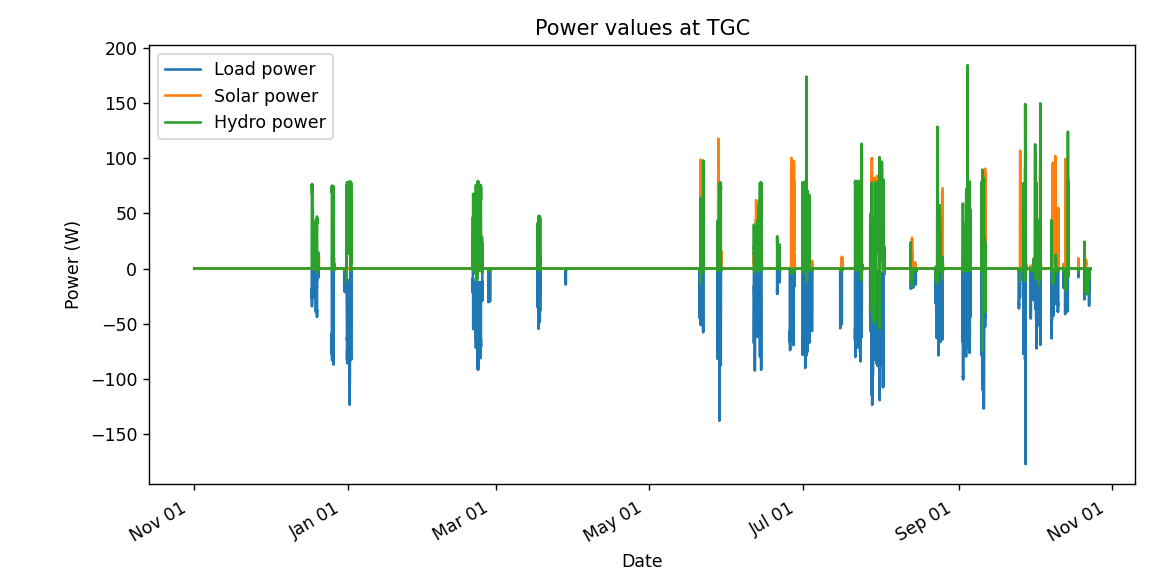

In [7]:
plt.figure()
ax = plt.gca()

df.plot(x='dateTime', y='loadPWR', ax=ax, label='Load power')
df.plot(x='dateTime', y='solarPWR', ax=ax, label='Solar power')
df.plot(x='dateTime', y='hydroPWR', ax=ax, label='Hydro power')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d '))#'%H%m'))

plt.title("Power values at TGC")
plt.xlabel("Date")
plt.ylabel("Power (W)")

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


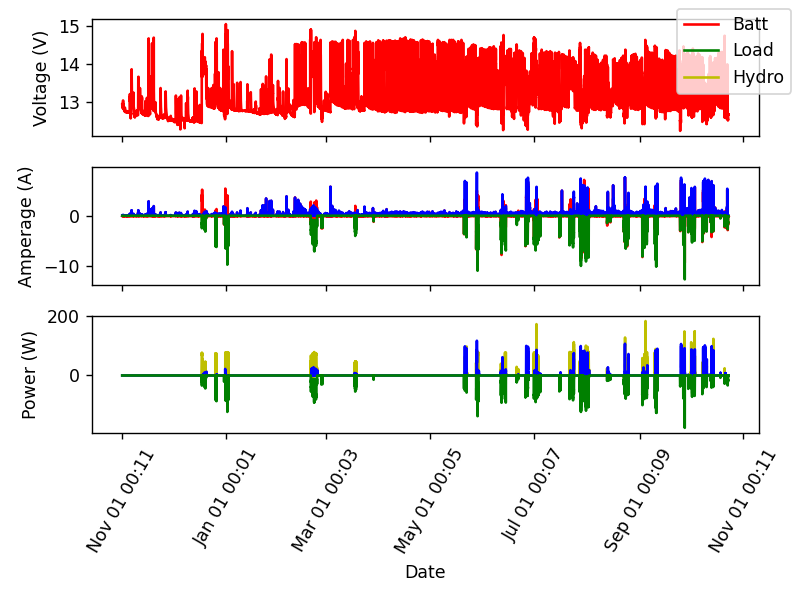

In [8]:
#plt.figure()
fig, axs = plt.subplots(3,1, sharex=True)
#plt.title("Voltages and Currents at the TGC")
#axs[0].plot(df.dateTime, df.SolarV, 'b', label='Solar')
axs[0].plot(df.dateTime, df.BattV, 'r', label='Batt' )
axs[1].plot(df.dateTime, df.BattA, 'r') #, label='Batt')
axs[1].plot(df.dateTime, df.SolarA, 'b') #, label='Solar')
axs[1].plot(df.dateTime, df.LoadA, 'g', label='Load')
axs[2].plot(df.dateTime, df.hydroPWR, 'y', label='Hydro')
axs[2].plot(df.dateTime, df.solarPWR, 'b') #, label='Solar')
axs[2].plot(df.dateTime, df.loadPWR, 'g') #, label='Load')
plt.xlabel("Date")
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d %H:%m'))
#axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
axs[0].set_ylabel("Voltage (V)")
axs[1].set_ylabel("Amperage (A)")
axs[2].set_ylabel("Power (W)")
plt.xticks(rotation=60)
fig.legend()
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


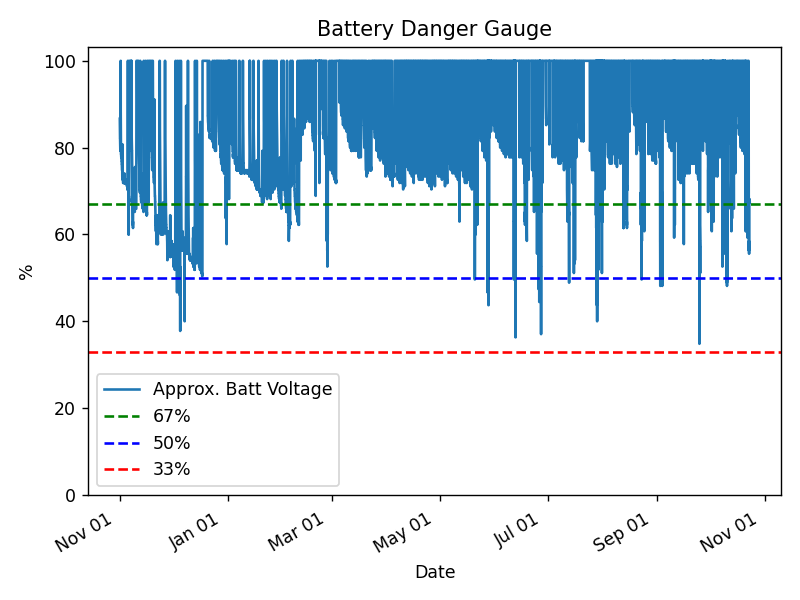

In [9]:
#Battery Danger Gauge

# Very rough approximation of battery charge state based on the voltage.
df['BatteryPercentage'] = ''

for i in range(len(df)):
    if df['BattV'].values[i] < 11.76:
        df['BatteryPercentage'].values[i] = 0
    elif df['BattV'].values[i] < 13.0:
        df['BatteryPercentage'].values[i] = (df['BattV'].values[i] - 11.75) / 0.0135
    else:
        df['BatteryPercentage'].values[i] = 100

plt.figure()
ax = plt.gca()

df.plot(x='dateTime', y='BatteryPercentage', ax=ax, label='Approx. Batt Voltage')
plt.axhline(y=67, color='g', linestyle='--', label='67%')
plt.axhline(y=50, color='b', linestyle='--', label='50%')
plt.axhline(y=33, color='r', linestyle='--', label='33%')



ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d '))#'%H%m'))

plt.ylim(ymin=0)
plt.title("Battery Danger Gauge")
plt.xlabel("Date")
plt.ylabel("%")
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
print("Max outside temperature reached: " + str(df['OutsideTemp'].max()) + "°C")
print("Minimum outside temperature reached: " + str(df['OutsideTemp'].min()) + "°C")

Max outside temperature reached: 35.0°C
Minimum outside temperature reached: -10.63°C


<IPython.core.display.Javascript object>


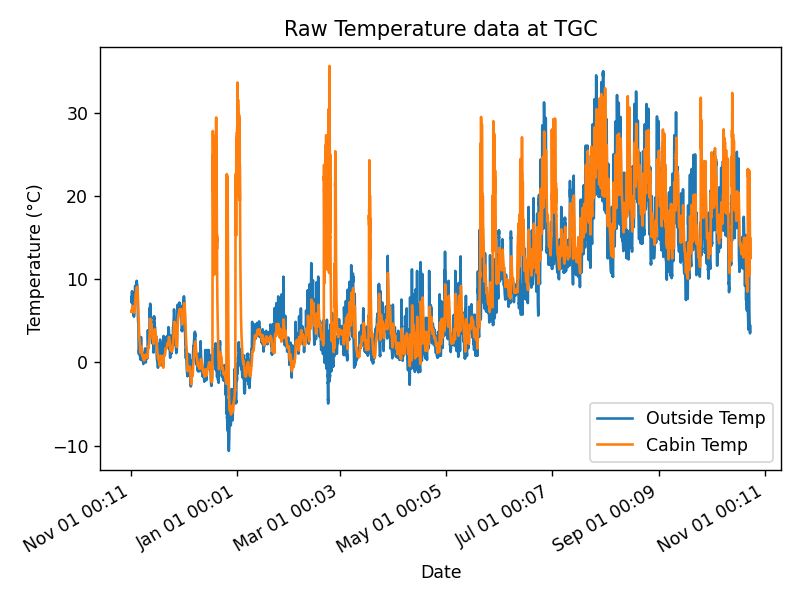

In [11]:
plt.figure()
ax = plt.gca()

df.plot(x='dateTime', y='OutsideTemp', ax=ax, label='Outside Temp')
df.plot(x='dateTime', y='CabinTemp', ax=ax, label='Cabin Temp')
#df.plot(x='dateTime', y='BoxTemp', ax=ax, label='Box Temp')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %H:%m'))
plt.title("Raw Temperature data at TGC")
plt.xlabel("Date")
plt.ylabel("Temperature (\N{DEGREE SIGN}C)")

plt.tight_layout()
plt.show()

In [12]:
# Create a new column with temperature difference data
df['TempDiff'] = df['OutsideTemp']-df['CabinTemp']

In [13]:
# Resample data to daily resolution

df_max  = df.resample('D', on='dateTime', origin='start_day', offset='5h').max()
df_min  = df.resample('D', on='dateTime', origin='start_day', offset='5h').min()
df_mean = df.resample('D', on='dateTime', origin='start_day', offset='5h').mean()
df_mean.reset_index(level=0, inplace=True)

## Plot Daily mean temperatures

<IPython.core.display.Javascript object>


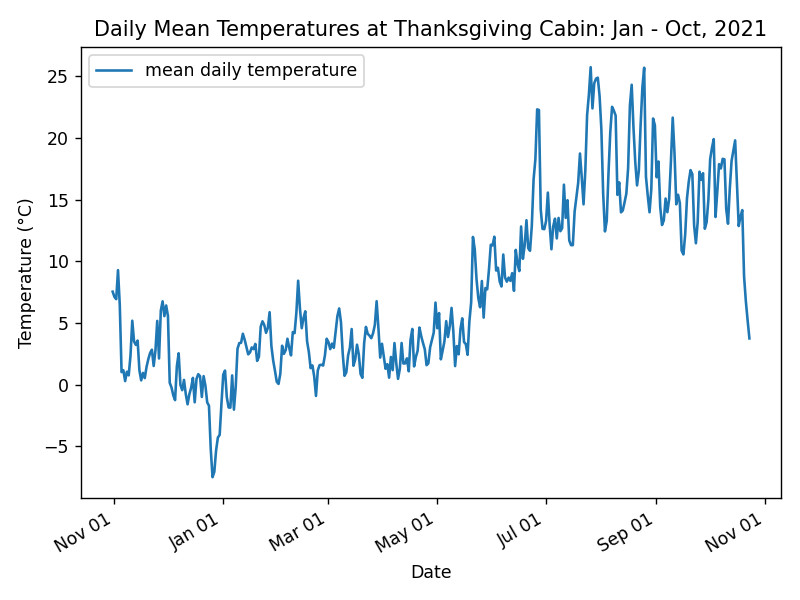

In [14]:
plt.figure()
ax = plt.gca()


df_mean.plot(kind='line', x='dateTime', y='OutsideTemp', ax=ax, label='mean daily temperature')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.title("Daily Mean Temperatures at Thanksgiving Cabin: Jan - Oct, 2021")
plt.xlabel("Date")
plt.ylabel("Temperature (\N{DEGREE SIGN}C)")

plt.tight_layout()
plt.show()


# Daily Min Max Temperatures

<IPython.core.display.Javascript object>


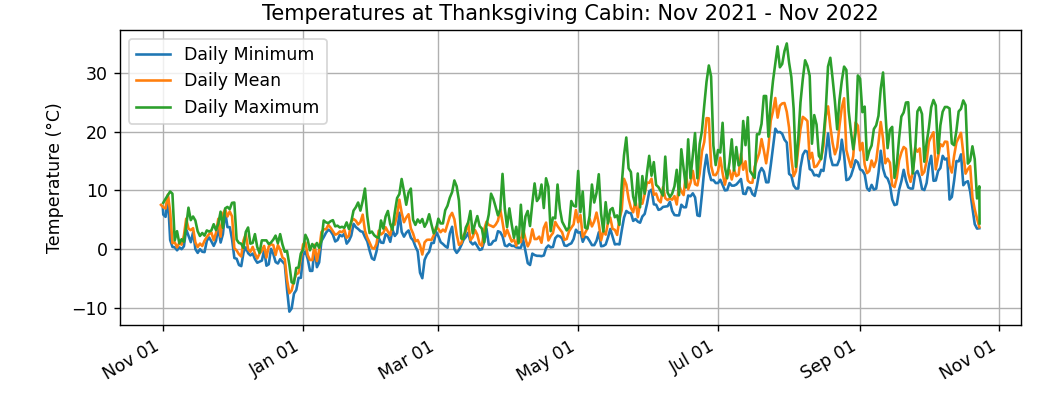

In [27]:
plt.figure()
ax = plt.gca()
df_min.plot(kind='line', x='dateTime', y='OutsideTemp', ax=ax, label='Daily Minimum')
df_mean.plot(kind='line', x='dateTime', y='OutsideTemp', ax=ax, label='Daily Mean')
df_max.plot(kind='line', x='dateTime', y='OutsideTemp', ax=ax, label='Daily Maximum')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.title("Temperatures at Thanksgiving Cabin: Nov 2021 - Nov 2022")
plt.xlabel("Date")
plt.ylabel("Temperature (\N{DEGREE SIGN}C)")
plt.grid('on')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


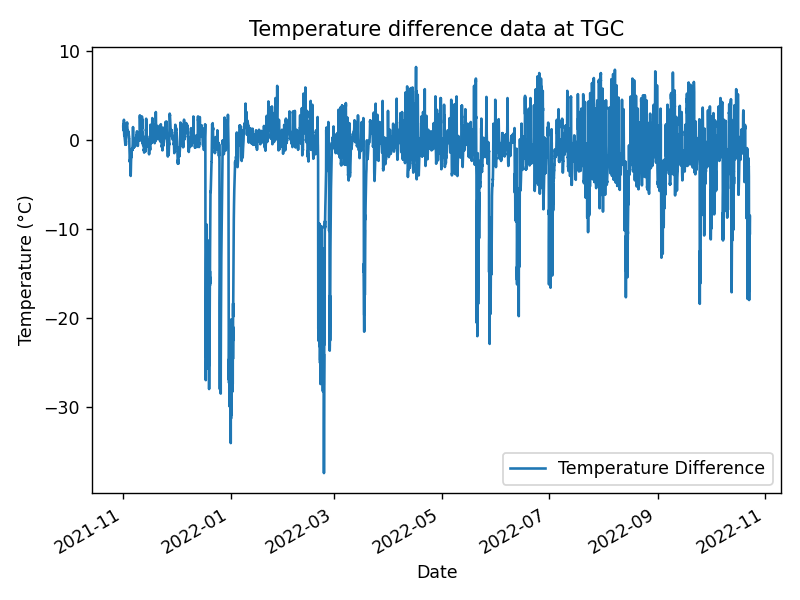

In [16]:
plt.figure()
ax = plt.gca()

df.plot(x='dateTime', y='TempDiff', ax=ax, label='Temperature Difference')

plt.title("Temperature difference data at TGC")
plt.xlabel("Date")
plt.ylabel("Temperature (\N{DEGREE SIGN}C)")

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


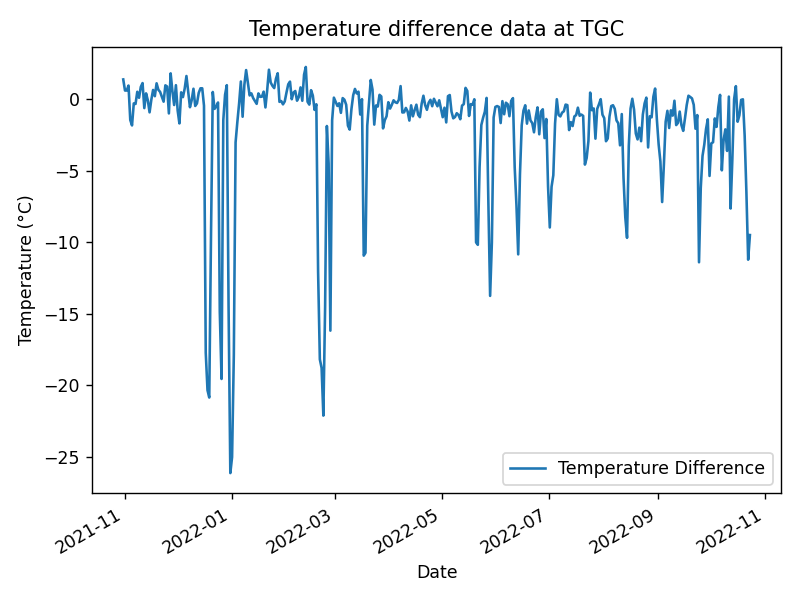

In [17]:
plt.figure()
ax = plt.gca()

df_mean.plot(x='dateTime', y='TempDiff', ax=ax, label='Temperature Difference')

plt.title("Temperature difference data at TGC")
plt.xlabel("Date")
plt.ylabel("Temperature (\N{DEGREE SIGN}C)")

plt.tight_layout()
plt.show()

In [18]:
out_df   = df[['dateTime', 'OutsideTemp']].copy()
cabin_df = df[['dateTime', 'CabinTemp']].copy()
#cabin_df.head()

In [19]:
out_df['dateTime']=pd.to_datetime(out_df['dateTime'])
cabin_df['dateTime']=pd.to_datetime(cabin_df['dateTime'])- pd.Timedelta(2, unit='h')
#cabin_df.head()

In [20]:
merged_df = pd.merge_asof(cabin_df, out_df, on='dateTime')
merged_df['TempDiff'] = merged_df['OutsideTemp'] - merged_df['CabinTemp']
#merged_df.head()

In [21]:
merged_df_mean = merged_df.resample('D', on='dateTime', origin='start_day', offset='5h').mean()
merged_df_mean.reset_index(level=0, inplace=True)

merged_df['rollSTD'] = merged_df['TempDiff'].rolling(100).mean()
merged_df['upSTD'] = merged_df['TempDiff'] + merged_df['rollSTD']*3
merged_df['downSTD'] = merged_df['TempDiff'] - merged_df['rollSTD']*3

<IPython.core.display.Javascript object>


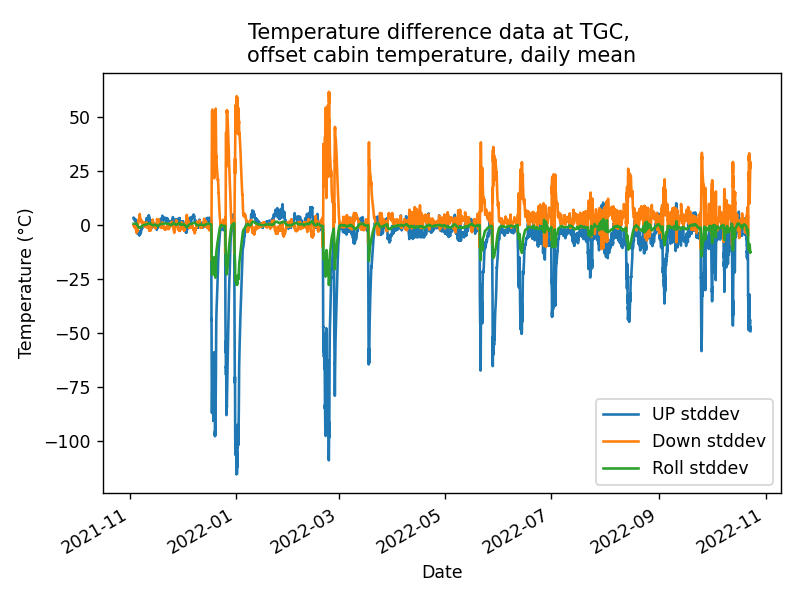

In [22]:
plt.figure()
ax = plt.gca()

merged_df.plot(x='dateTime', y='upSTD', ax=ax, label='UP stddev')
merged_df.plot(x='dateTime', y='downSTD', ax=ax, label='Down stddev')
merged_df.plot(x='dateTime', y='rollSTD', ax=ax, label='Roll stddev')

plt.title("Temperature difference data at TGC, \noffset cabin temperature, daily mean")
plt.xlabel("Date")
plt.ylabel("Temperature (\N{DEGREE SIGN}C)")

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


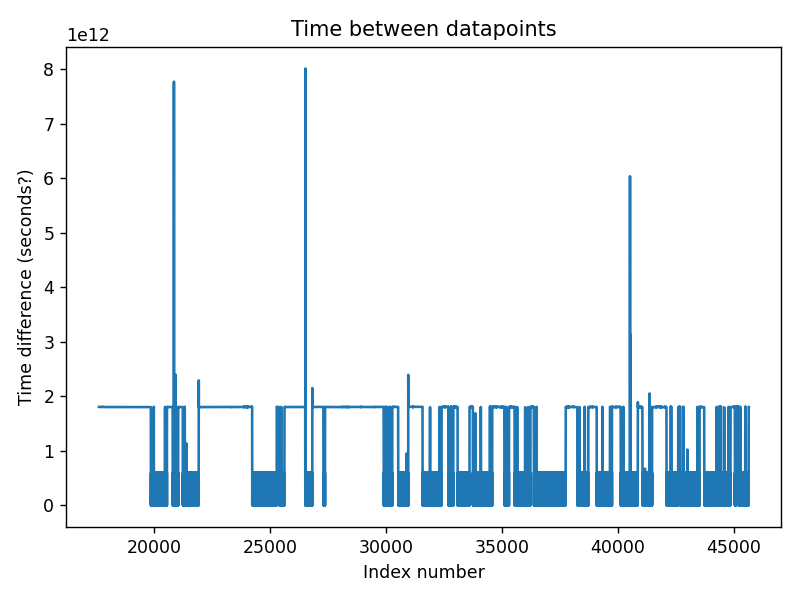

In [23]:
plt.figure()
ax = plt.gca()

df['dateTime'].diff().plot(ax=ax, label='Temperature Difference')

plt.title("Time between datapoints")
plt.xlabel("Index number")
plt.ylabel("Time difference (seconds?)")

plt.tight_layout()
plt.show()